Proje [linki](https://www.kaggle.com/competitions/spaceship-titanic/overview)

In [616]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [617]:
sample = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
sample

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [618]:
import warnings
warnings.filterwarnings("ignore")

In [619]:
x_train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
x_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [620]:
x_test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
x_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [621]:
df = pd.concat([x_train, x_test], ignore_index=True)

In [622]:
df.shape

(12970, 14)

In [623]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [624]:
df["VIP"].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [625]:
df["Destination"].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

In [626]:
df["VIP"][df["VIP"].isnull() == True] = df["VIP"].value_counts().index[0]

In [627]:
df["Cabin"].value_counts()

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [628]:
aziz = list(df["Cabin"][df["Cabin"].isnull()!=True].index)
for i in aziz:
    df["Cabin"][i] = df["Cabin"][i][:1]

In [629]:
df["Cabin"].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Cabin, dtype: int64

In [630]:
df["Cabin"][df["Cabin"].isnull()==True] = df["Cabin"].value_counts().index[0]

In [631]:
df["CryoSleep"].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [632]:
df["CryoSleep"][df["CryoSleep"].isnull() == True] = df["CryoSleep"].value_counts().index[0]

In [633]:
df["HomePlanet"].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

In [634]:
df["HomePlanet"][df["HomePlanet"].isnull()==True] = df["HomePlanet"].value_counts().index[0]

In [635]:
df["Destination"][df["Destination"].isnull()==True] = df["Destination"].value_counts().index[0]

In [636]:
df.groupby("VIP")["RoomService"].mean()

VIP
False    217.200113
True     486.349442
Name: RoomService, dtype: float64

In [637]:
df["Age"]=df["Age"].fillna(df.groupby('VIP')["Age"].transform('mean'))

In [638]:
df["RoomService"]=df["RoomService"].fillna(df.groupby('VIP')["RoomService"].transform('mean'))

In [639]:
df["FoodCourt"]=df["FoodCourt"].fillna(df.groupby('VIP')["FoodCourt"].transform('mean'))

In [640]:
df["ShoppingMall"]=df["ShoppingMall"].fillna(df.groupby('VIP')["ShoppingMall"].transform('mean'))

In [641]:
df["Spa"]=df["Spa"].fillna(df.groupby('VIP')["Spa"].transform('mean'))

In [642]:
df["VRDeck"]=df["VRDeck"].fillna(df.groupby('VIP')["VRDeck"].transform('mean'))

In [643]:
df.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  object 
 3   Cabin         12970 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12970 non-null  float64
 6   VIP           12970 non-null  object 
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [645]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [646]:
df.replace({False:0, True:1}, inplace = True)

In [647]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,0,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0
2,0003_01,Europa,0,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0


# Explaratory Data Analysis(EDA)

In [648]:
group_person_num = []
for i in range(len(df)):
    num = int(df.PassengerId[i][-2:])
    group_person_num.append(num)

In [649]:
df["G_person_num"] = group_person_num

In [650]:
df.G_person_num.value_counts()

1    9280
2    2135
3     840
4     338
5     184
6     108
7      66
8      19
Name: G_person_num, dtype: int64

<AxesSubplot:>

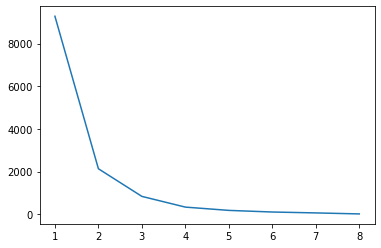

In [651]:
df.G_person_num.value_counts().plot()

In [652]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,G_person_num
0,0001_01,Europa,0,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1
1,0002_01,Earth,0,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1
2,0003_01,Europa,0,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1
3,0003_02,Europa,0,A,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2
4,0004_01,Earth,0,F,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1


# Classification

In [653]:
aziz = abs(df.corr()["Transported"][(abs(df.corr()["Transported"])>.2)&(df.corr()["Transported"]<.9)])
aziz

CryoSleep      0.460132
RoomService    0.242206
Spa            0.218780
VRDeck         0.204622
Name: Transported, dtype: float64

In [654]:
aziz = list(aziz.index)
aziz

['CryoSleep', 'RoomService', 'Spa', 'VRDeck']

In [655]:
df.shape

(12970, 15)

In [656]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [657]:
x_train = df[:len(x_train)]
x_test = df[-len(x_test):]

In [658]:
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [659]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,G_person_num
0,0001_01,Europa,0,B,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1
1,0002_01,Earth,0,F,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1
2,0003_01,Europa,0,A,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1
3,0003_02,Europa,0,A,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,2
4,0004_01,Earth,0,F,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1


In [660]:
x_train["Transported"] = x_train["Transported"].astype("int32")

In [661]:
x = x_train[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', "HomePlanet", "Cabin", "Destination"]]
x_test = x_test[['CryoSleep', 'RoomService', 'Spa', 'VRDeck', "HomePlanet", "Cabin", "Destination"]]
y = x_train["Transported"]

In [662]:
x = pd.get_dummies(x, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

In [663]:
x.shape, x_test.shape

((8693, 15), (4277, 15))

In [664]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [665]:
from sklearn.model_selection import train_test_split

In [666]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size=0.80, random_state=42)

In [667]:
len(train_x), len(train_y), len(test_x), len(test_y)

(6954, 6954, 1739, 1739)

In [668]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

In [669]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1048,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics='accuracy')

In [670]:
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=1500, batch_size=256, verbose=1)

Epoch 1/1500
28/28 [==============================] - 6s 78ms/step - loss: 0.7580 - accuracy: 0.6217 - val_loss: 0.5935 - val_accuracy: 0.7481
Epoch 2/1500
28/28 [==============================] - 1s 36ms/step - loss: 0.6368 - accuracy: 0.6721 - val_loss: 0.5765 - val_accuracy: 0.7458
Epoch 3/1500
28/28 [==============================] - 1s 36ms/step - loss: 0.6094 - accuracy: 0.6879 - val_loss: 0.5545 - val_accuracy: 0.7435
Epoch 4/1500
28/28 [==============================] - 1s 36ms/step - loss: 0.5761 - accuracy: 0.7045 - val_loss: 0.5546 - val_accuracy: 0.7464
Epoch 5/1500
28/28 [==============================] - 1s 35ms/step - loss: 0.5565 - accuracy: 0.7171 - val_loss: 0.5424 - val_accuracy: 0.7476
Epoch 6/1500
28/28 [==============================] - 1s 35ms/step - loss: 0.5502 - accuracy: 0.7238 - val_loss: 0.5337 - val_accuracy: 0.7453
Epoch 7/1500
28/28 [==============================] - 1s 35ms/step - loss: 0.5397 - accuracy: 0.7272 - val_loss: 0.5306 - val_accuracy: 0.7447

In [671]:
model.evaluate(train_x,train_y)

218/218 [==============================] - 1s 4ms/step - loss: 0.3746 - accuracy: 0.8197


[0.3746030032634735, 0.8196721076965332]

In [672]:
model.evaluate(test_x,test_y)

55/55 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7763


[0.46700525283813477, 0.7763082385063171]

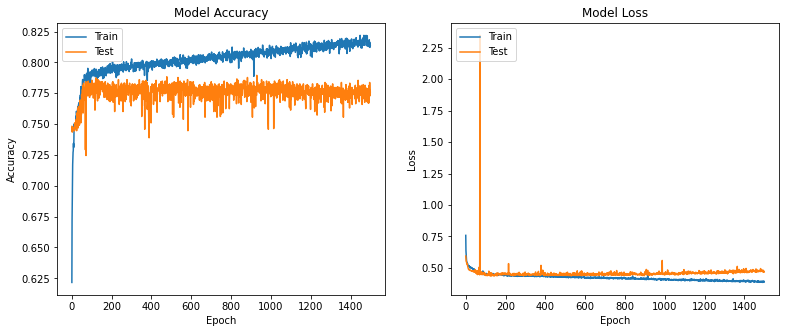

In [673]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,3,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();

In [674]:
x_test.head()

,CryoSleep,RoomService,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1
1,0,0.0,2823.0,0.0,0,0,0,0,0,0,1,0,0,0,1
2,1,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0
3,0,0.0,181.0,585.0,1,0,0,1,0,0,0,0,0,0,1
4,0,10.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1


In [675]:
tahmin = model.predict(x_test)

In [676]:
rounded = [round(x[0]) for x in tahmin]
rounded[:5]

[1, 0, 1, 1, 1]

In [677]:
len(rounded)

4277

In [678]:
sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [679]:
sample["Transported"] = rounded

In [680]:
sample.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [681]:
sample.replace({1:True, 0:False}, inplace=True)

In [683]:
sample.to_csv("my_pred1.csv", index=False)